# Tarea día 9
## Ejercicios de pandas

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Ejercicio 1

1. Generar arreglos de numpy para obtener el resultado de $ z = f(x,y) $ para un conjunto de entrada aleatorio de al menos 100 filas.

- Crear un `DataFrame` de pandas con las columnas $x$, $y$ y $z$.
- Obtener el promedio de cada `Series` en el `DataFrame`.

In [2]:
# Tu código acá
z=lambda x,y: 2*x+5*y
ev=100
a=np.random.randint(100,size=(ev,2))
x=a[:,0]
y=a[:,1]
z_ev=np.ravel(z(x,y))
df=pd.DataFrame({"x":x,"y":y,"z":z_ev})
df

,x,y,z
0,54,71,463
1,48,18,186
2,75,88,590
3,38,76,456
4,66,33,297
...,...,...,...
95,55,9,155
96,13,51,281
97,47,64,414
98,50,67,435


In [3]:
df.mean()

x     54.49
y     49.91
z    358.53
dtype: float64

## Ejercicio 1.1

De forma similar al ejercicio anterior, genere un `DataFrame` con los resultados de una función $y = f(x)$ con al menos 100 filas. 

- Grafique los resultados con `matplotlib` utilizando 2 variantes:

    - a. Utilizando los arreglos de numpy (objetos `ndarray`) que utilizó para generar el `DataFrame`.
    - b. Utilizando los objetos `Series` del `DataFrame`.
    
- Obtenga el objeto *handler* de la gráfica y guarde la gráfica en PDF.

- Asegúrese de entender la diferencia entre generar la gráfica para guardarla (sin mostrarla) y generar la gráfica para mostrarla.

In [4]:
# Tu código acá
y=lambda x: x**3+5
ev=100
a=np.random.randint(100,size=(ev,1))
x=(np.ravel(a))
x.sort()
y_ev=np.ravel(y(x))
df=pd.DataFrame({"x":x,"y":y_ev})
df

,x,y
0,0,5
1,1,6
2,3,32
3,3,32
4,5,130
...,...,...
95,94,830589
96,95,857380
97,97,912678
98,99,970304


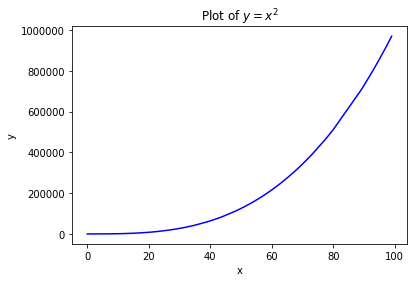

In [5]:
# create a figure/canvas of desired size
plt.figure(figsize=(6, 4))

# plot values; with a color `red`
plt.plot(x, y_ev, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Plot of $y=x^2$")
plt.show()

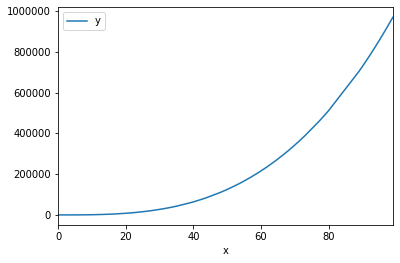

In [6]:
df.plot.line(x="x", y="y")

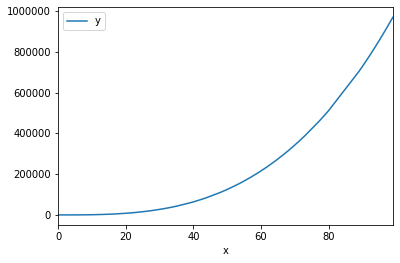

In [7]:
a=df.plot.line(x="x", y="y")
a.get_figure().savefig("ejemplo_handler.pdf")

## Ejercicio 2

1. Prueba 5 funciones de la primera página del *cheat sheet* no vistas en la exposición.

### 1. pd.merge (ydf , zdf)

In [8]:
# Tu código acá
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],'value': [5, 6, 7, 8]})


In [9]:
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [10]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [11]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [12]:
df1.merge(df2, left_on='lkey', right_on='rkey',suffixes=('_left', '_right'))


,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


### 2. pd.concat ([df1, df2[)

In [13]:
#Combine two Series.
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [14]:
#Append columns of DataFrame
pd.concat([s1, s2], axis=1)

,0,1
0,a,c
1,b,d


### 3. pd.melt(df)
Unpivot a DataFrame from wide format to long format, optionally leaving identifier variables set.

In [15]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},\
                   'B': {0: 1, 1: 3, 2: 5},\
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [16]:
pd.melt(df)

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


### 4. pd.isnull
Detect missing values for an array-like object.

In [17]:
pd.isna('dog')

False

In [18]:
pd.isna(np.nan)

True

In [19]:
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
array


array([[ 1., nan,  3.],
       [ 4.,  5., nan]])

In [20]:
pd.isna(array)

array([[False,  True, False],
       [False, False,  True]])

### 5. pd.df.dropna
Remove missing values.

In [21]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],\
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],\
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),\
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [22]:
#Drop the rows where at least one element is missing.
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [23]:
#Drop the columns where at least one element is missing.
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [24]:
#Drop the rows where all elements are missing.
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [25]:
#Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
#Define in which columns to look for missing values.
df.dropna(subset=['name', 'born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


## Ejercicio 3

Resuelva las siguientes preguntas utilizando las funciones de pandas. Ayúdese con la hoja de trucos.

In [27]:
df = pd.read_csv("data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - ¿Cuál es la tarifa máxima que se pagó? ¿Y la mediana?

In [28]:
# Tu código acá
max_fare = df['Fare'].max()
median_fare = df['Fare'].median()
print("max_fare:  %f " %max_fare,"\n" "median_fare:  %f " %median_fare)

max_fare:  512.329200  
median_fare:  14.454200 


- Calcule la tasa de supervivencia promedio para todos los pasajeros (nota: la columna `Survived` indica si alguien sobrevivió (1) o no (0)).

In [29]:
# Tu código acá
num_surv = df["Survived"].sum()
tot_psng = df['Survived'].count()
prct_surv = num_surv/tot_psng 
prct_surv

0.3838383838383838

- Haga una gráfica de la distribución de edades de los pasajeros del Titanic

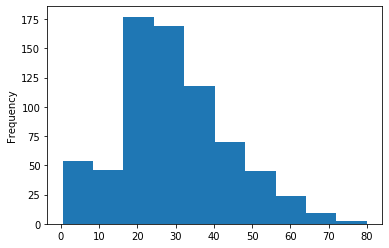

In [30]:
# Tu código acá
edad = df["Age"]
plot_edad = df["Age"].plot.hist()
plot_edad

- Según el conjunto de datos del Titanic, seleccione todas las filas para pasajeros masculinos y calcule la edad media de esos pasajeros. Haz lo mismo para las pasajeras.

In [31]:
# Tu código acá
male = (df[df["Sex"] == "male"]["Age"]).mean()
female = (df[df["Sex"] == "female"]["Age"]).mean()
print ("Edad media hombres: %f" %male, "\n" "Edad media mujeres: %f " %female)


Edad media hombres: 30.726645 
Edad media mujeres: 27.915709 


- Según el conjunto de datos del Titanic, ¿cuántos pasajeros mayores de 70 estaban en el Titanic?

In [32]:
# Tu código acá
may_70 = df[df["Age"] > 70]["PassengerId"].count()
may_70

5

- Calcula la edad promedio para cada sexo. Ahora utiliza el método `groupby`.

In [33]:
# Tu código acá
#edadmedia_groupby=df["Sex"]
#edadmedia_groupby
df.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- Calcule esta relación de supervivencia para todos los pasajeros menores de 25 años (recuerde: filtrado / indexación booleana).

In [34]:
# Tu código acá
less_25_sup = (df[df["Age"] < 25]['Survived'].sum())/\
              (df[df["Age"] < 25]['Survived'].count())
less_25_sup

0.4244604316546763

- ¿Cuál es la diferencia en la proporción de supervivencia entre sexos?

In [35]:
# Tu código acá
female_sup=df.groupby(['Sex'])['Survived'].sum()[0]/\
           df.groupby(['Sex'])['Survived'].count()[0]
male_sup=df.groupby(['Sex'])['Survived'].sum()[1]/\
         df.groupby(['Sex'])['Survived'].count()[1]

dif_sup = female_sup-male_sup
dif_sup

0.5531300709799203

- ¿O cómo difiere la proporción de sobrevivientes entre las diferentes clases de pasajeros? Haz una gráfica de barras visualizando la relación de supervivencia para las 3 clases.

In [36]:
# Tu código acá
pclass_surv=(df.groupby(['Pclass'])['Survived'].sum())/\
            (df.groupby(['Pclass'])['Survived'].count())
pclass_surv

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

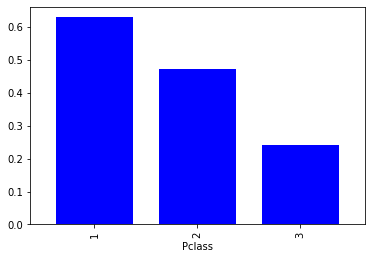

In [37]:
pclass_surv.plot(kind='bar',color='blue',width=0.75)

- Haga una gráfica de barras para visualizar la tarifa promedio pagada por los pasajeros de acuerdo a su edad. Para esto:
    - Primero, separamos a los pasajeros por rango, utilizando la función `pd.cut` y agregamos esta serie al DataFrame.
    - Debemos agrupar por esta columna y calcular el promedio de las tarifas.
    - Por último, agregamos `plot(kind='bar')` para obtener la gráfica de barras.

In [38]:
# Tu código acá
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]"


In [39]:
AgeClass_Fare=df.groupby(by='AgeClass')['Fare'].mean()
AgeClass_Fare

AgeClass
(0, 10]     30.434439
(10, 20]    29.529531
(20, 30]    28.306719
(30, 40]    42.496100
(40, 50]    41.163181
(50, 60]    44.774802
(60, 70]    45.910782
(70, 80]    25.936680
Name: Fare, dtype: float64

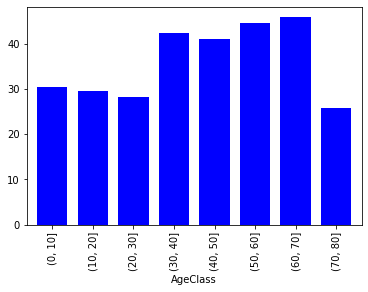

In [40]:
AgeClass_Fare.plot(kind='bar',color='blue',width=0.75)